In [1]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data_directory = '/Users/Reynard/dropbox/Data/kaggle/Personalized Medicine'

In [3]:
train_variants = pd.read_csv(data_directory + "/input/training_variants")
test_variants = pd.read_csv(data_directory + "/input/test_variants")
train_text = pd.read_csv(data_directory + "/input/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text = pd.read_csv(data_directory + "/input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [4]:
train = pd.merge(train_variants, train_text, how='left', on='ID')
y_train = train['Class'].values
X_train = train.drop('Class', axis=1)

In [5]:
X_test = pd.merge(test_variants, test_text, how='left', on='ID')
test_index = X_test['ID'].values

In [6]:
sentences_train = X_train['Text']
sentences_train.shape
sentences_train.head()

0    Cyclin-dependent kinases (CDKs) regulate a var...
1     Abstract Background  Non-small cell lung canc...
2     Abstract Background  Non-small cell lung canc...
3    Recent evidence has demonstrated that acquired...
4    Oncogenic mutations in the monomeric Casitas B...
Name: Text, dtype: object

In [7]:
sentences_test = X_test['Text']
sentences_test.shape
sentences_test.head()

0    2. This mutation resulted in a myeloproliferat...
1     Abstract The Large Tumor Suppressor 1 (LATS1)...
2    Vascular endothelial growth factor receptor (V...
3    Inflammatory myofibroblastic tumor (IMT) is a ...
4     Abstract Retinoblastoma is a pediatric retina...
Name: Text, dtype: object

In [8]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf.fit_transform(sentences_train)
tfidf_test = tfidf.transform(sentences_test)

In [9]:
svd = TruncatedSVD(400, algorithm='arpack')
svd_train = svd.fit_transform(tfidf_train)
svd_test = svd.transform(tfidf_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [11]:
svd_train.shape

(3321, 400)

In [12]:
input_shape = svd_train.shape[1]
output_shape = len(train['Class'].unique())
batch_n = 32

In [13]:
def model_hypothesis():
    model = Sequential()
    model.add(Dense(512, input_dim=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_shape, kernel_initializer='normal', activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_enc = encoder.transform(y_train)

In [15]:
y_ind = np_utils.to_categorical(y_enc)

In [24]:
estimator = KerasClassifier(build_fn=model_hypothesis, epochs=1000, batch_size=batch_n)
estimator.fit(svd_train, y_ind, validation_split=0.05)

Train on 3154 samples, validate on 167 samples
Epoch 1/1000
3154/3154 [==============================] - 2s - loss: 1.8837 - acc: 0.2657 - val_loss: 1.6606 - val_acc: 0.4012
Epoch 2/1000
3154/3154 [==============================] - 1s - loss: 1.6946 - acc: 0.3259 - val_loss: 1.6331 - val_acc: 0.3593
Epoch 3/1000
3154/3154 [==============================] - 1s - loss: 1.5325 - acc: 0.4081 - val_loss: 1.6516 - val_acc: 0.3533
Epoch 4/1000
3154/3154 [==============================] - 0s - loss: 1.4090 - acc: 0.4521 - val_loss: 1.7564 - val_acc: 0.3473
Epoch 5/1000
3154/3154 [==============================] - 1s - loss: 1.3299 - acc: 0.4670 - val_loss: 1.9161 - val_acc: 0.3174
Epoch 6/1000
3154/3154 [==============================] - 1s - loss: 1.2747 - acc: 0.5095 - val_loss: 1.7238 - val_acc: 0.3832
Epoch 7/1000
3154/3154 [==============================] - 0s - loss: 1.2359 - acc: 0.5193 - val_loss: 1.7751 - val_acc: 0.3772
Epoch 8/1000
3154/3154 [==============================] - 1s - l

3154/3154 [==============================] - 1s - loss: 0.7548 - acc: 0.7156 - val_loss: 2.7976 - val_acc: 0.2335
Epoch 65/1000
3154/3154 [==============================] - 0s - loss: 0.7494 - acc: 0.7242 - val_loss: 2.5961 - val_acc: 0.2635
Epoch 66/1000
3154/3154 [==============================] - 0s - loss: 0.7500 - acc: 0.7099 - val_loss: 2.7922 - val_acc: 0.3114
Epoch 67/1000
3154/3154 [==============================] - 0s - loss: 0.7480 - acc: 0.7251 - val_loss: 2.8101 - val_acc: 0.3234
Epoch 68/1000
3154/3154 [==============================] - 0s - loss: 0.7511 - acc: 0.7229 - val_loss: 2.7957 - val_acc: 0.3353
Epoch 69/1000
3154/3154 [==============================] - 1s - loss: 0.7392 - acc: 0.7251 - val_loss: 2.7415 - val_acc: 0.2635
Epoch 70/1000
3154/3154 [==============================] - 1s - loss: 0.7498 - acc: 0.7185 - val_loss: 2.8655 - val_acc: 0.3353
Epoch 71/1000
3154/3154 [==============================] - 1s - loss: 0.7422 - acc: 0.7330 - val_loss: 2.7751 - val_ac

3154/3154 [==============================] - 0s - loss: 0.6180 - acc: 0.7819 - val_loss: 3.0121 - val_acc: 0.3174
Epoch 128/1000
3154/3154 [==============================] - 0s - loss: 0.6245 - acc: 0.7806 - val_loss: 3.1358 - val_acc: 0.3293
Epoch 129/1000
3154/3154 [==============================] - 1s - loss: 0.6340 - acc: 0.7695 - val_loss: 3.2332 - val_acc: 0.3293
Epoch 130/1000
3154/3154 [==============================] - 0s - loss: 0.6453 - acc: 0.7733 - val_loss: 3.0023 - val_acc: 0.3234
Epoch 131/1000
3154/3154 [==============================] - 0s - loss: 0.6134 - acc: 0.7819 - val_loss: 3.3453 - val_acc: 0.3353
Epoch 132/1000
3154/3154 [==============================] - 0s - loss: 0.6140 - acc: 0.7781 - val_loss: 3.1122 - val_acc: 0.3234
Epoch 133/1000
3154/3154 [==============================] - 0s - loss: 0.6141 - acc: 0.7708 - val_loss: 3.3491 - val_acc: 0.3234
Epoch 134/1000
3154/3154 [==============================] - 1s - loss: 0.6001 - acc: 0.7838 - val_loss: 3.2664 -

3154/3154 [==============================] - 0s - loss: 0.5759 - acc: 0.7955 - val_loss: 3.4368 - val_acc: 0.3114
Epoch 191/1000
3154/3154 [==============================] - 0s - loss: 0.5996 - acc: 0.7939 - val_loss: 3.4464 - val_acc: 0.2994
Epoch 192/1000
3154/3154 [==============================] - 0s - loss: 0.5629 - acc: 0.7942 - val_loss: 3.7183 - val_acc: 0.3054
Epoch 193/1000
3154/3154 [==============================] - 0s - loss: 0.5800 - acc: 0.7939 - val_loss: 3.5995 - val_acc: 0.2994
Epoch 194/1000
3154/3154 [==============================] - 0s - loss: 0.5499 - acc: 0.7971 - val_loss: 3.6334 - val_acc: 0.3114
Epoch 195/1000
3154/3154 [==============================] - 0s - loss: 0.5775 - acc: 0.7907 - val_loss: 3.5476 - val_acc: 0.3174
Epoch 196/1000
3154/3154 [==============================] - 0s - loss: 0.5674 - acc: 0.7971 - val_loss: 3.7412 - val_acc: 0.3054
Epoch 197/1000
3154/3154 [==============================] - 0s - loss: 0.5885 - acc: 0.7926 - val_loss: 3.4801 -

3154/3154 [==============================] - 0s - loss: 0.5617 - acc: 0.7996 - val_loss: 3.7225 - val_acc: 0.2695
Epoch 254/1000
3154/3154 [==============================] - 1s - loss: 0.5563 - acc: 0.8085 - val_loss: 3.7316 - val_acc: 0.2934
Epoch 255/1000
3154/3154 [==============================] - 0s - loss: 0.5694 - acc: 0.7968 - val_loss: 3.7489 - val_acc: 0.2754
Epoch 256/1000
3154/3154 [==============================] - 0s - loss: 0.5651 - acc: 0.8034 - val_loss: 3.7062 - val_acc: 0.2934
Epoch 257/1000
3154/3154 [==============================] - 0s - loss: 0.5664 - acc: 0.7964 - val_loss: 3.9194 - val_acc: 0.2874
Epoch 258/1000
3154/3154 [==============================] - 0s - loss: 0.5340 - acc: 0.8022 - val_loss: 4.0532 - val_acc: 0.2635
Epoch 259/1000
3154/3154 [==============================] - 0s - loss: 0.5481 - acc: 0.8031 - val_loss: 3.8331 - val_acc: 0.2575
Epoch 260/1000
3154/3154 [==============================] - 0s - loss: 0.5503 - acc: 0.8094 - val_loss: 4.0695 -

3154/3154 [==============================] - 0s - loss: 0.5462 - acc: 0.8167 - val_loss: 3.8592 - val_acc: 0.2754
Epoch 317/1000
3154/3154 [==============================] - 0s - loss: 0.5435 - acc: 0.8155 - val_loss: 3.8055 - val_acc: 0.2874
Epoch 318/1000
3154/3154 [==============================] - 0s - loss: 0.5474 - acc: 0.8082 - val_loss: 3.7103 - val_acc: 0.2695
Epoch 319/1000
3154/3154 [==============================] - 0s - loss: 0.5533 - acc: 0.8041 - val_loss: 3.5990 - val_acc: 0.2874
Epoch 320/1000
3154/3154 [==============================] - 0s - loss: 0.5507 - acc: 0.8104 - val_loss: 3.7139 - val_acc: 0.2754
Epoch 321/1000
3154/3154 [==============================] - 0s - loss: 0.5495 - acc: 0.8053 - val_loss: 3.7140 - val_acc: 0.2874
Epoch 322/1000
3154/3154 [==============================] - 0s - loss: 0.5303 - acc: 0.8088 - val_loss: 3.6415 - val_acc: 0.2874
Epoch 323/1000
3154/3154 [==============================] - 0s - loss: 0.5332 - acc: 0.8129 - val_loss: 3.6654 -

3154/3154 [==============================] - 0s - loss: 0.5305 - acc: 0.8190 - val_loss: 4.1821 - val_acc: 0.2814
Epoch 380/1000
3154/3154 [==============================] - 0s - loss: 0.5348 - acc: 0.8145 - val_loss: 3.7997 - val_acc: 0.2994
Epoch 381/1000
3154/3154 [==============================] - 0s - loss: 0.5110 - acc: 0.8250 - val_loss: 4.1650 - val_acc: 0.3054
Epoch 382/1000
3154/3154 [==============================] - 0s - loss: 0.5296 - acc: 0.8186 - val_loss: 4.1709 - val_acc: 0.2814
Epoch 383/1000
3154/3154 [==============================] - 0s - loss: 0.5105 - acc: 0.8224 - val_loss: 4.0870 - val_acc: 0.2934
Epoch 384/1000
3154/3154 [==============================] - 0s - loss: 0.5277 - acc: 0.8158 - val_loss: 4.0895 - val_acc: 0.3054
Epoch 385/1000
3154/3154 [==============================] - 0s - loss: 0.5111 - acc: 0.8256 - val_loss: 4.1236 - val_acc: 0.2934
Epoch 386/1000
3154/3154 [==============================] - 0s - loss: 0.5257 - acc: 0.8145 - val_loss: 4.0027 -

3154/3154 [==============================] - 0s - loss: 0.5598 - acc: 0.8079 - val_loss: 4.0073 - val_acc: 0.2695
Epoch 443/1000
3154/3154 [==============================] - 0s - loss: 0.5319 - acc: 0.8167 - val_loss: 3.9070 - val_acc: 0.2754
Epoch 444/1000
3154/3154 [==============================] - 0s - loss: 0.5427 - acc: 0.8136 - val_loss: 4.0756 - val_acc: 0.2874
Epoch 445/1000
3154/3154 [==============================] - 0s - loss: 0.5194 - acc: 0.8202 - val_loss: 4.2363 - val_acc: 0.2754
Epoch 446/1000
3154/3154 [==============================] - 1s - loss: 0.5456 - acc: 0.8136 - val_loss: 4.1889 - val_acc: 0.2695
Epoch 447/1000
3154/3154 [==============================] - 1s - loss: 0.5496 - acc: 0.8196 - val_loss: 4.0132 - val_acc: 0.2934
Epoch 448/1000
3154/3154 [==============================] - 0s - loss: 0.5312 - acc: 0.8148 - val_loss: 3.9625 - val_acc: 0.2994
Epoch 449/1000
3154/3154 [==============================] - 0s - loss: 0.5395 - acc: 0.8205 - val_loss: 3.6964 -

3154/3154 [==============================] - 1s - loss: 0.5138 - acc: 0.8152 - val_loss: 3.9340 - val_acc: 0.2874
Epoch 506/1000
3154/3154 [==============================] - 1s - loss: 0.5314 - acc: 0.8199 - val_loss: 3.8160 - val_acc: 0.2874
Epoch 507/1000
3154/3154 [==============================] - 1s - loss: 0.5160 - acc: 0.8193 - val_loss: 3.9013 - val_acc: 0.3174
Epoch 508/1000
3154/3154 [==============================] - 1s - loss: 0.5171 - acc: 0.8164 - val_loss: 3.8157 - val_acc: 0.2994
Epoch 509/1000
3154/3154 [==============================] - 1s - loss: 0.5258 - acc: 0.8114 - val_loss: 4.0963 - val_acc: 0.2695
Epoch 510/1000
3154/3154 [==============================] - 1s - loss: 0.5215 - acc: 0.8180 - val_loss: 3.7541 - val_acc: 0.2754
Epoch 511/1000
3154/3154 [==============================] - 1s - loss: 0.5162 - acc: 0.8152 - val_loss: 3.8691 - val_acc: 0.3054
Epoch 512/1000
3154/3154 [==============================] - 1s - loss: 0.5367 - acc: 0.8114 - val_loss: 3.8673 -

3154/3154 [==============================] - 1s - loss: 0.5288 - acc: 0.8136 - val_loss: 3.8485 - val_acc: 0.2874
Epoch 569/1000
3154/3154 [==============================] - 1s - loss: 0.5055 - acc: 0.8256 - val_loss: 3.9359 - val_acc: 0.2994
Epoch 570/1000
3154/3154 [==============================] - 1s - loss: 0.5428 - acc: 0.8136 - val_loss: 3.6984 - val_acc: 0.3174
Epoch 571/1000
3154/3154 [==============================] - 1s - loss: 0.5479 - acc: 0.8104 - val_loss: 3.8060 - val_acc: 0.3174
Epoch 572/1000
3154/3154 [==============================] - 1s - loss: 0.5298 - acc: 0.8285 - val_loss: 3.8460 - val_acc: 0.3174
Epoch 573/1000
3154/3154 [==============================] - 1s - loss: 0.5135 - acc: 0.8161 - val_loss: 4.0057 - val_acc: 0.3114
Epoch 574/1000
3154/3154 [==============================] - 1s - loss: 0.5153 - acc: 0.8190 - val_loss: 4.0288 - val_acc: 0.2934
Epoch 575/1000
3154/3154 [==============================] - 1s - loss: 0.5074 - acc: 0.8263 - val_loss: 4.0732 -

3154/3154 [==============================] - 1s - loss: 0.5615 - acc: 0.8129 - val_loss: 3.7094 - val_acc: 0.3114
Epoch 632/1000
3154/3154 [==============================] - 1s - loss: 0.5343 - acc: 0.8167 - val_loss: 3.6242 - val_acc: 0.3174
Epoch 633/1000
3154/3154 [==============================] - 0s - loss: 0.5567 - acc: 0.8177 - val_loss: 3.6685 - val_acc: 0.3054
Epoch 634/1000
3154/3154 [==============================] - 1s - loss: 0.5337 - acc: 0.8247 - val_loss: 3.6543 - val_acc: 0.3174
Epoch 635/1000
3154/3154 [==============================] - 0s - loss: 0.5570 - acc: 0.8164 - val_loss: 3.6407 - val_acc: 0.3114
Epoch 636/1000
3154/3154 [==============================] - 0s - loss: 0.5334 - acc: 0.8196 - val_loss: 3.5990 - val_acc: 0.3473
Epoch 637/1000
3154/3154 [==============================] - 0s - loss: 0.5282 - acc: 0.8174 - val_loss: 3.5568 - val_acc: 0.3293
Epoch 638/1000
3154/3154 [==============================] - 1s - loss: 0.5313 - acc: 0.8142 - val_loss: 3.6450 -

3154/3154 [==============================] - 1s - loss: 0.5343 - acc: 0.8107 - val_loss: 3.7219 - val_acc: 0.2934
Epoch 695/1000
3154/3154 [==============================] - 1s - loss: 0.5300 - acc: 0.8148 - val_loss: 3.6078 - val_acc: 0.2934
Epoch 696/1000
3154/3154 [==============================] - 1s - loss: 0.5456 - acc: 0.8069 - val_loss: 3.5959 - val_acc: 0.3114
Epoch 697/1000
3154/3154 [==============================] - 1s - loss: 0.5177 - acc: 0.8259 - val_loss: 3.7648 - val_acc: 0.3174
Epoch 698/1000
3154/3154 [==============================] - 1s - loss: 0.5424 - acc: 0.8161 - val_loss: 3.7253 - val_acc: 0.2994
Epoch 699/1000
3154/3154 [==============================] - 1s - loss: 0.5387 - acc: 0.8228 - val_loss: 3.6993 - val_acc: 0.2934
Epoch 700/1000
3154/3154 [==============================] - 1s - loss: 0.5371 - acc: 0.8161 - val_loss: 3.6857 - val_acc: 0.3054
Epoch 701/1000
3154/3154 [==============================] - 1s - loss: 0.5399 - acc: 0.8094 - val_loss: 3.6164 -

3154/3154 [==============================] - 1s - loss: 0.5439 - acc: 0.8196 - val_loss: 3.7828 - val_acc: 0.2814
Epoch 758/1000
3154/3154 [==============================] - 1s - loss: 0.5268 - acc: 0.8164 - val_loss: 4.0046 - val_acc: 0.3114
Epoch 759/1000
3154/3154 [==============================] - 1s - loss: 0.5363 - acc: 0.8180 - val_loss: 3.9607 - val_acc: 0.2994
Epoch 760/1000
3154/3154 [==============================] - 1s - loss: 0.5476 - acc: 0.8126 - val_loss: 3.8581 - val_acc: 0.2814
Epoch 761/1000
3154/3154 [==============================] - 0s - loss: 0.5194 - acc: 0.8155 - val_loss: 4.0257 - val_acc: 0.2874
Epoch 762/1000
3154/3154 [==============================] - 1s - loss: 0.5585 - acc: 0.8107 - val_loss: 3.5449 - val_acc: 0.2994
Epoch 763/1000
3154/3154 [==============================] - 0s - loss: 0.5424 - acc: 0.8199 - val_loss: 3.7289 - val_acc: 0.3234
Epoch 764/1000
3154/3154 [==============================] - 1s - loss: 0.5328 - acc: 0.8180 - val_loss: 3.7522 -

3154/3154 [==============================] - 0s - loss: 0.5433 - acc: 0.8177 - val_loss: 3.8928 - val_acc: 0.3234
Epoch 821/1000
3154/3154 [==============================] - 1s - loss: 0.5099 - acc: 0.8244 - val_loss: 3.9512 - val_acc: 0.3234
Epoch 822/1000
3154/3154 [==============================] - 1s - loss: 0.5586 - acc: 0.8145 - val_loss: 3.7709 - val_acc: 0.3293
Epoch 823/1000
3154/3154 [==============================] - 1s - loss: 0.5139 - acc: 0.8244 - val_loss: 3.9521 - val_acc: 0.3234
Epoch 824/1000
3154/3154 [==============================] - 0s - loss: 0.5223 - acc: 0.8209 - val_loss: 3.8875 - val_acc: 0.3174
Epoch 825/1000
3154/3154 [==============================] - 1s - loss: 0.5386 - acc: 0.8240 - val_loss: 3.9882 - val_acc: 0.3114
Epoch 826/1000
3154/3154 [==============================] - 1s - loss: 0.5179 - acc: 0.8253 - val_loss: 3.9714 - val_acc: 0.3054
Epoch 827/1000
3154/3154 [==============================] - 1s - loss: 0.4980 - acc: 0.8272 - val_loss: 3.9077 -

3154/3154 [==============================] - 0s - loss: 0.5340 - acc: 0.8199 - val_loss: 4.0484 - val_acc: 0.2994
Epoch 884/1000
3154/3154 [==============================] - 0s - loss: 0.5130 - acc: 0.8126 - val_loss: 4.1209 - val_acc: 0.2874
Epoch 885/1000
3154/3154 [==============================] - 0s - loss: 0.5295 - acc: 0.8183 - val_loss: 4.2861 - val_acc: 0.2934
Epoch 886/1000
3154/3154 [==============================] - 0s - loss: 0.5287 - acc: 0.8218 - val_loss: 4.1138 - val_acc: 0.3174
Epoch 887/1000
3154/3154 [==============================] - 0s - loss: 0.5574 - acc: 0.8228 - val_loss: 3.9790 - val_acc: 0.2994
Epoch 888/1000
3154/3154 [==============================] - 0s - loss: 0.5586 - acc: 0.8120 - val_loss: 3.7737 - val_acc: 0.3114
Epoch 889/1000
3154/3154 [==============================] - 0s - loss: 0.5131 - acc: 0.8345 - val_loss: 3.9112 - val_acc: 0.3174
Epoch 890/1000
3154/3154 [==============================] - 0s - loss: 0.5392 - acc: 0.8142 - val_loss: 3.9916 -

3154/3154 [==============================] - 1s - loss: 0.5316 - acc: 0.8164 - val_loss: 4.2706 - val_acc: 0.2814
Epoch 947/1000
3154/3154 [==============================] - 1s - loss: 0.5460 - acc: 0.8167 - val_loss: 4.2673 - val_acc: 0.3054
Epoch 948/1000
3154/3154 [==============================] - 1s - loss: 0.5448 - acc: 0.8164 - val_loss: 4.2914 - val_acc: 0.3054
Epoch 949/1000
3154/3154 [==============================] - 0s - loss: 0.5379 - acc: 0.8167 - val_loss: 4.1893 - val_acc: 0.3054
Epoch 950/1000
3154/3154 [==============================] - 0s - loss: 0.5547 - acc: 0.8047 - val_loss: 4.1869 - val_acc: 0.3054
Epoch 951/1000
3154/3154 [==============================] - 0s - loss: 0.5414 - acc: 0.8259 - val_loss: 4.2527 - val_acc: 0.3114
Epoch 952/1000
3154/3154 [==============================] - 0s - loss: 0.5312 - acc: 0.8190 - val_loss: 4.3359 - val_acc: 0.3114
Epoch 953/1000
3154/3154 [==============================] - 0s - loss: 0.5828 - acc: 0.8145 - val_loss: 4.3182 -

In [20]:
from keras.utils import plot_model
plot_model(model_hypothesis(), to_file='model_hypothesis1.png')

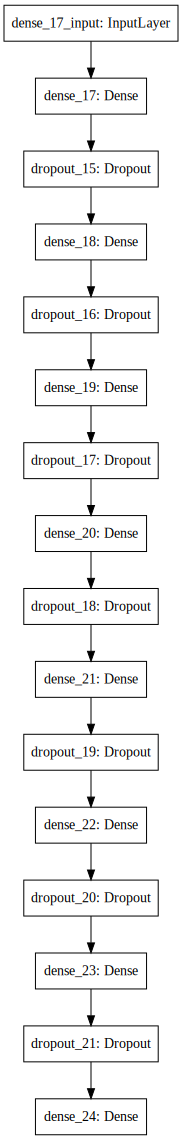

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_hypothesis()).create(prog='dot', format='svg'))

In [23]:
y_pred = estimator.predict_proba(svd_test)

5280/5668 [==========================>...] - ETA: 0s

In [ ]:
submission = pd.DataFrame(y_pred)
submission['id'] = test_index
submission.columns = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'id']
submission.to_csv(directory + "/output/my_submission.csv",index=False)